In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris() #Загружаем данные, смотрим описание
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
variety = pd.DataFrame(iris.target, columns = ['variety']) #Оставляем два критерия и целевую переменную

In [6]:
from sklearn.model_selection import train_test_split  #Делим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, variety, random_state=42)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Обучаем
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [8]:
y_pred = lda.predict(X_test) #Прогноз

In [11]:
from sklearn.metrics import accuracy_score #Точность 0,86 - модель достаточно точная
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.868421052631579

In [12]:
centers = lda.means_ #определяем центры

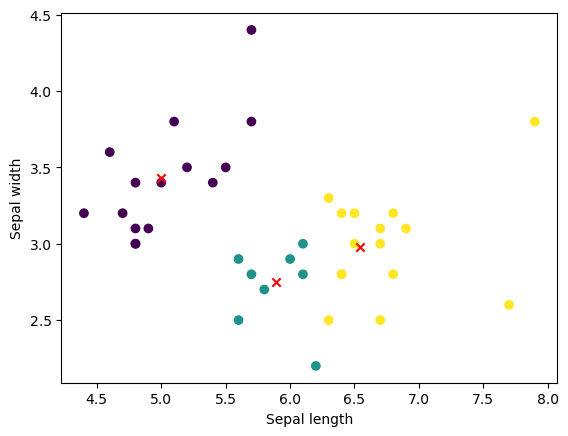

In [13]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'] , c = y_pred) #Визуализация для тестовой выборки с центрами
plt.scatter(centers[:, 0], centers[:, 1], marker = 'x', color = 'r')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()



In [15]:
from sklearn.cluster import KMeans #Далее работаем только с data без целевой переменной, применяем метод локтя
inertias =[]
for n in range (1, 10):
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

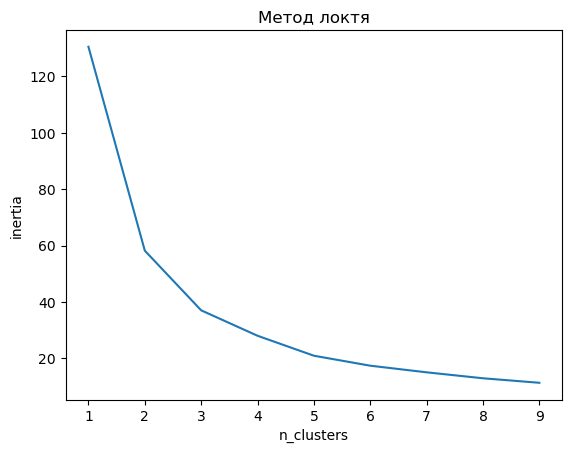

In [16]:
plt.plot(range (1, 10), inertias) #Визуализируем. 
plt.title ("Метод локтя")
plt.xlabel ('n_clusters')
plt.ylabel('inertia')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


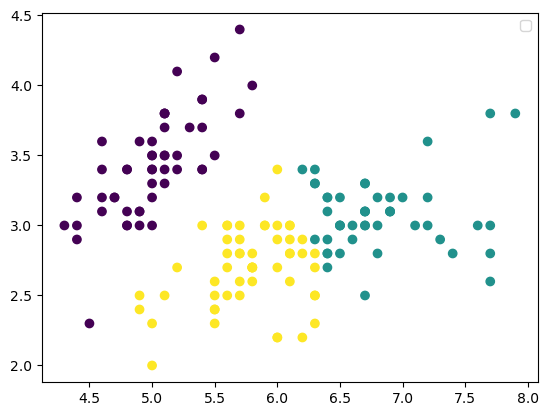

In [18]:
kmeans = KMeans (n_clusters = 3, random_state = 42)
kmeans.fit(data)
plt.scatter(data ['sepal length (cm)'], data['sepal width (cm)'], c = kmeans.labels_)
plt.legend()
plt.show()
"""Поскольку по графику метода локтя нельзя явно сказать, что кластеров именно 3, а не 4, к примеру.
Поэтому я визуализировала и один, и другой вариант """

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


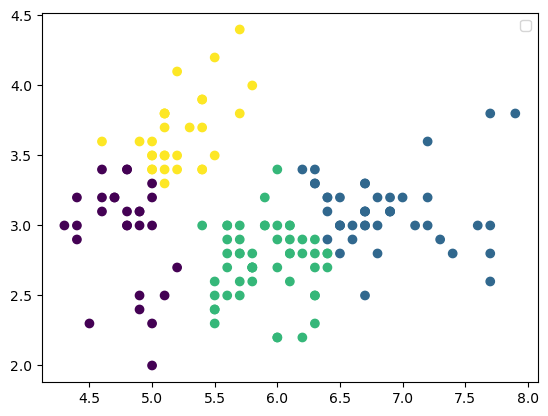

In [20]:
kmeans2 = KMeans (n_clusters = 4, random_state = 42)
kmeans2.fit(data)
plt.scatter(data ['sepal length (cm)'], data['sepal width (cm)'], c = kmeans2.labels_)
plt.legend()
plt.show()